<hr style="border:2px solid gray"> </hr>
<img src="https://mma.prnewswire.com/media/1095203/East_Tennessee_State_University_Logo.jpg?p=facebook" width=200 height=200 />

<div class="alert alert-block alert-info">
    <h1 style="text-align: center">CSCI 5037 - NLP & Text Analysis</h1>
</div>

# <center>Lab 8 - Sequence Modeling</center>

**<center>Dr. Ahmad Al-Doulat </center>**
<center>Department of Computing </center>
<center>East Tennessee State University</center>

<hr style="border:2px solid lightblue"> </hr>

**In this assignment, you'll get to practice the concepts and skills covered in the course so far. The main objective of this assignment is to implement and use some of the tools, algorithms, and techniques to perform sentiment analysis on textual data..**



**Guidelines**
* Download `AmazonReviews.csv` file from D2L.
* Make sure to run all the code cells, otherwise you may get errors like `NameError` for undefined variables.
* Do not change variable names, delete cells or disturb other existing code. It may cause problems during evaluation.
* In some cases, you may need to add some code cells or new statements before or after the line of code containing the `???`.
* Use markdown cells to write your discussions and reflections.

**Procedure**
* Save your work as `IPYNB` file named `Lab8.ipynb` and submit to D2L `Lab 8 - Sequence Modeling (Dropbox)` by the due date.
* As you go through this notebook, you will find the symbol `???` in certain places. To complete this assignment, you must replace all the `???` with appropriate values, expressions or statements to ensure that the notebook runs properly end-to-end.
* Include your response for `Part 1` and `Part 2` in this notebook.

<div class="alert alert-block alert-info">

# Part 1: Activity

</div>

#### Read the content of the `AmazonReviews.csv` into a dataframe called `reviews_df` and perform the following:
1. **Preprocess the `reviews_df` dataframe to prepare it for the following questions.**

2. **Build a SimpleRNN Network to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy**

3. **Build a Gated Recurrent Unit to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy**

4. **Build a Long Short-Term Memory Model to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy**

5. **Which model performs better and why?**

In [1]:
import pandas as pd
reviews_df = pd.read_csv('AmazonReviews.csv')

In [2]:
reviews_df.shape

(25000, 10)

In [3]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      25000 non-null  int64 
 1   ProductId               25000 non-null  object
 2   UserId                  25000 non-null  object
 3   ProfileName             24999 non-null  object
 4   HelpfulnessNumerator    25000 non-null  int64 
 5   HelpfulnessDenominator  25000 non-null  int64 
 6   Score                   25000 non-null  int64 
 7   Time                    25000 non-null  int64 
 8   Summary                 25000 non-null  object
 9   Text                    25000 non-null  object
dtypes: int64(5), object(5)
memory usage: 1.9+ MB


In [4]:
reviews_df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  
0  Good Quality Dog Food  I have bought several of the Vitality canned d...  
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...  
2  "Delight" says it all  This is a confection that has been around a fe...  
3         Cough Medicine  If you are looking for the secret ingredient i...  
4            Great taffy  Great taffy at a great price.  There was a wid...

**1. Preprocess the `reviews_df` dataframe to prepare it for the following questions.**

In [5]:
reviews_df = reviews_df.drop_duplicates(subset=['ProductId', 'UserId', 'Text'])

In [6]:
reviews_df.shape

(24945, 10)

In [7]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [8]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

def preprocess(documents):
    processed_docs = []
    for doc in documents:
        tokens = doc.lower().split()
        lemmatized_tokens = [lemmatizer.lemmatize(word) for word in tokens]
        processed_docs.append(" ".join(lemmatized_tokens))
    return processed_docs

reviews_df['preprocessed_review'] = preprocess(reviews_df['Text'])

In [9]:
reviews_df.head()

Id   ProductId          UserId                      ProfileName  \
0   1  B001E4KFG0  A3SGXH7AUHU8GW                       delmartian   
1   2  B00813GRG4  A1D87F6ZCVE5NK                           dll pa   
2   3  B000LQOCH0   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"   
3   4  B000UA0QIQ  A395BORC6FGVXV                             Karl   
4   5  B006K2ZZ7K  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"   

   HelpfulnessNumerator  HelpfulnessDenominator  Score        Time  \
0                     1                       1      5  1303862400   
1                     0                       0      1  1346976000   
2                     1                       1      4  1219017600   
3                     3                       3      2  1307923200   
4                     0                       0      5  1350777600   

                 Summary                                               Text  \
0  Good Quality Dog Food  I have bought several of the Vitality canned d...   
1      Not as Advertised  Product arrived labeled as Jumbo Salted Peanut...   
2  "Delight" says it all  This is a confection that has been around a fe...   
3         Cough Medicine  If you are looking for the secret ingredient i...   
4            Great taffy  Great taffy at a great price.  There was a wid...   

                                 preprocessed_review  
0  i have bought several of the vitality canned d...  
1  product arrived labeled a jumbo salted peanuts...  
2  this is a confection that ha been around a few...  
3  if you are looking for the secret ingredient i...  
4  great taffy at a great price. there wa a wide ...

In [10]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [11]:
from nltk.sentiment import SentimentIntensityAnalyzer

sia = SentimentIntensityAnalyzer()

In [12]:
res = {}
for i, row in reviews_df.iterrows():
    text = row['preprocessed_review']
    myid = row['Id']
    res[myid] = sia.polarity_scores(text)

In [13]:
res = pd.DataFrame(res).T
res = res.reset_index().rename(columns={'index': 'Id'})

res['Id'] = res['Id'].astype(str)
reviews_df['Id'] = reviews_df['Id'].astype(str)

reviews_df = res.merge(reviews_df, how='left', on='Id')

In [14]:
reviews_df.head()

Id    neg    neu    pos  compound   ProductId          UserId  \
0  1  0.000  0.695  0.305    0.9441  B001E4KFG0  A3SGXH7AUHU8GW   
1  2  0.147  0.853  0.000   -0.5664  B00813GRG4  A1D87F6ZCVE5NK   
2  3  0.069  0.753  0.178    0.9079  B000LQOCH0   ABXLMWJIXXAIN   
3  4  0.000  1.000  0.000    0.0000  B000UA0QIQ  A395BORC6FGVXV   
4  5  0.000  0.552  0.448    0.9468  B006K2ZZ7K  A1UQRSCLF8GW1T   

                       ProfileName  HelpfulnessNumerator  \
0                       delmartian                     1   
1                           dll pa                     0   
2  Natalia Corres "Natalia Corres"                     1   
3                             Karl                     3   
4    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                 preprocessed_review  
0  i have bought several of the vitality canned d...  
1  product arrived labeled a jumbo salted peanuts...  
2  this is a confection that ha been around a few...  
3  if you are looking for the secret ingredient i...  
4  great taffy at a great price. there wa a wide ...

In [15]:
reviews_df['sentiment_score'] = reviews_df['compound'].apply(lambda x: 1 if x >= 0 else 0)

In [16]:
reviews_df.insert(5, 'sentiment_score', reviews_df.pop('sentiment_score'))

In [17]:
reviews_df.head()

Id    neg    neu    pos  compound  sentiment_score   ProductId  \
0  1  0.000  0.695  0.305    0.9441                1  B001E4KFG0   
1  2  0.147  0.853  0.000   -0.5664                0  B00813GRG4   
2  3  0.069  0.753  0.178    0.9079                1  B000LQOCH0   
3  4  0.000  1.000  0.000    0.0000                1  B000UA0QIQ   
4  5  0.000  0.552  0.448    0.9468                1  B006K2ZZ7K   

           UserId                      ProfileName  HelpfulnessNumerator  \
0  A3SGXH7AUHU8GW                       delmartian                     1   
1  A1D87F6ZCVE5NK                           dll pa                     0   
2   ABXLMWJIXXAIN  Natalia Corres "Natalia Corres"                     1   
3  A395BORC6FGVXV                             Karl                     3   
4  A1UQRSCLF8GW1T    Michael D. Bigham "M. Wassir"                     0   

   HelpfulnessDenominator  Score        Time                Summary  \
0                       1      5  1303862400  Good Quality Dog Food   
1                       0      1  1346976000      Not as Advertised   
2                       1      4  1219017600  "Delight" says it all   
3                       3      2  1307923200         Cough Medicine   
4                       0      5  1350777600            Great taffy   

                                                Text  \
0  I have bought several of the Vitality canned d...   
1  Product arrived labeled as Jumbo Salted Peanut...   
2  This is a confection that has been around a fe...   
3  If you are looking for the secret ingredient i...   
4  Great taffy at a great price.  There was a wid...   

                                 preprocessed_review  
0  i have bought several of the vitality canned d...  
1  product arrived labeled a jumbo salted peanuts...  
2  this is a confection that ha been around a few...  
3  if you are looking for the secret ingredient i...  
4  great taffy at a great price. there wa a wide ...

In [18]:
# Tokenization and Conversion to sequences
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer

top_words = 10000
max_words = 500

tokenizer = Tokenizer(num_words=top_words, oov_token="<UNK>")
tokenizer.fit_on_texts(reviews_df['preprocessed_review'])
sequences = tokenizer.texts_to_sequences(reviews_df['preprocessed_review'])

In [19]:
# Padding sequences
import keras

padded_sequences = keras.utils.pad_sequences(sequences, maxlen=max_words, padding='post', truncating='post')

In [20]:
# Splitting data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, reviews_df['sentiment_score'], test_size=0.2, random_state=42)

# Convert labels to tensors
y_train = tf.convert_to_tensor(y_train)
y_test = tf.convert_to_tensor(y_test)

**2. Build a SimpleRNN Network to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy**

In [21]:
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import Dense

model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 500, 32)           320000    
                                                                 
 simple_rnn (SimpleRNN)      (None, 32)                2080      
                                                                 
 dense (Dense)               (None, 1)                 33        
                                                                 
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [22]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [23]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
156/156 [==============================] - 34s 210ms/step - loss: 0.3381 - accuracy: 0.8977 - val_loss: 0.3314 - val_accuracy: 0.8974
Epoch 2/10
156/156 [==============================] - 31s 200ms/step - loss: 0.3306 - accuracy: 0.8977 - val_loss: 0.3309 - val_accuracy: 0.8974
Epoch 3/10
156/156 [==============================] - 30s 195ms/step - loss: 0.3305 - accuracy: 0.8977 - val_loss: 0.3310 - val_accuracy: 0.8974
Epoch 4/10
156/156 [==============================] - 30s 194ms/step - loss: 0.3303 - accuracy: 0.8977 - val_loss: 0.3313 - val_accuracy: 0.8974
Epoch 5/10
156/156 [==============================] - 30s 193ms/step - loss: 0.3307 - accuracy: 0.8977 - val_loss: 0.3310 - val_accuracy: 0.8974
Epoch 6/10
156/156 [==============================] - 30s 194ms/step - loss: 0.3304 - accuracy: 0.8977 - val_loss: 0.3310 - val_accuracy: 0.8974
Epoch 7/10
156/156 [==============================] - 29s 187ms/step - loss: 0.3302 - accuracy: 0.8976 - val_loss: 0.3310 - val_ac

In [24]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def plot_history(history):
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1

    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)

    fig.tight_layout()

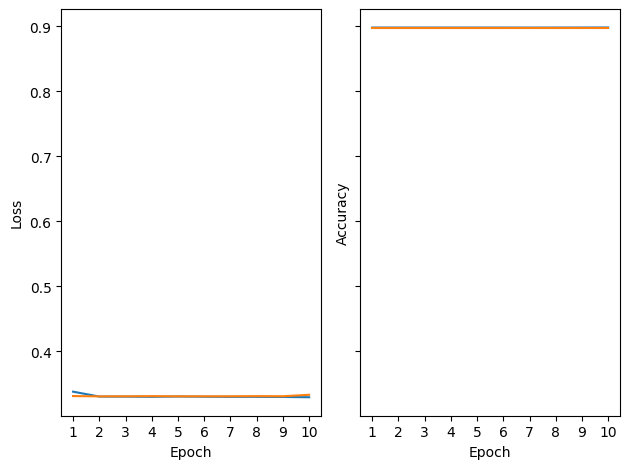

In [25]:
plot_history(history)

**3. Build a Gated Recurrent Unit to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy**

In [26]:
from keras.layers import GRU
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 500, 32)           320000    
                                                                 
 gru (GRU)                   (None, 32)                6336      
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [28]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
156/156 [==============================] - 67s 406ms/step - loss: 0.3760 - accuracy: 0.8876 - val_loss: 0.3317 - val_accuracy: 0.8974
Epoch 2/10
156/156 [==============================] - 61s 391ms/step - loss: 0.3316 - accuracy: 0.8977 - val_loss: 0.3310 - val_accuracy: 0.8974
Epoch 3/10
156/156 [==============================] - 62s 398ms/step - loss: 0.3308 - accuracy: 0.8977 - val_loss: 0.3311 - val_accuracy: 0.8974
Epoch 4/10
156/156 [==============================] - 64s 408ms/step - loss: 0.3308 - accuracy: 0.8977 - val_loss: 0.3308 - val_accuracy: 0.8974
Epoch 5/10
156/156 [==============================] - 65s 418ms/step - loss: 0.3304 - accuracy: 0.8977 - val_loss: 0.3316 - val_accuracy: 0.8974
Epoch 6/10
156/156 [==============================] - 73s 469ms/step - loss: 0.3306 - accuracy: 0.8977 - val_loss: 0.3319 - val_accuracy: 0.8974
Epoch 7/10
156/156 [==============================] - 66s 422ms/step - loss: 0.3302 - accuracy: 0.8977 - val_loss: 0.3321 - val_ac

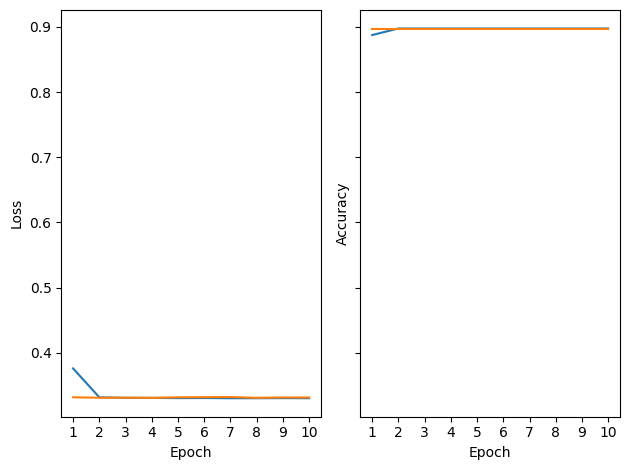

In [29]:
plot_history(history)

**4. Build a Long Short-Term Memory Model to predict the sentiment of each review. Then, evaluate the performance of the model in terms of loss and accuracy**

In [30]:
from keras.layers import LSTM
model = Sequential()
model.add(Embedding(top_words, 32, input_length=max_words))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 500, 32)           320000    
                                                                 
 lstm (LSTM)                 (None, 32)                8320      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [32]:
history = model.fit(X_train, y_train,
                   validation_data=(X_test, y_test),
                   epochs=10,
                   batch_size=128,
                   verbose=1)

Epoch 1/10
156/156 [==============================] - 71s 430ms/step - loss: 0.3641 - accuracy: 0.8929 - val_loss: 0.3311 - val_accuracy: 0.8974
Epoch 2/10
156/156 [==============================] - 68s 434ms/step - loss: 0.3307 - accuracy: 0.8977 - val_loss: 0.3321 - val_accuracy: 0.8974
Epoch 3/10
156/156 [==============================] - 69s 445ms/step - loss: 0.3306 - accuracy: 0.8977 - val_loss: 0.3308 - val_accuracy: 0.8974
Epoch 4/10
156/156 [==============================] - 69s 440ms/step - loss: 0.3303 - accuracy: 0.8977 - val_loss: 0.3320 - val_accuracy: 0.8974
Epoch 5/10
156/156 [==============================] - 68s 437ms/step - loss: 0.3307 - accuracy: 0.8977 - val_loss: 0.3310 - val_accuracy: 0.8974
Epoch 6/10
156/156 [==============================] - 73s 466ms/step - loss: 0.3305 - accuracy: 0.8977 - val_loss: 0.3308 - val_accuracy: 0.8974
Epoch 7/10
156/156 [==============================] - 69s 443ms/step - loss: 0.3304 - accuracy: 0.8977 - val_loss: 0.3309 - val_ac

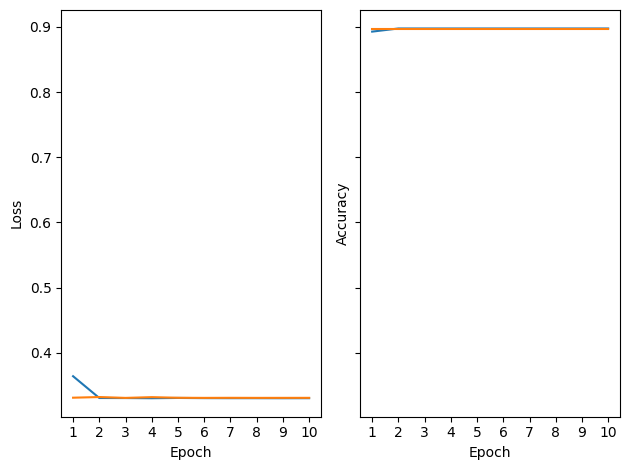

In [33]:
plot_history(history)

**5. Which model performs better and why?**

**Answer:** All three models—SimpleRNN, Gated Recurrent Unit (GRU), and Long Short-Term Memory (LSTM)—have similar performance in terms of accuracy and loss values, i.e., 89.77% and 33%, respectively. All the models converge quickly but fail to improve over epochs, as their validation loss remains roughly constant at 0.33. However, GRU and LSTM take longer to train due to their higher computational complexity compared to SimpleRNN. Therefore, since all the models exhibit the same performance, if I had to make a choice, I would select SimpleRNN because it is faster, having fewer parameters and lacking the additional gates and complexity of GRU and LSTM.

<div class="alert alert-block alert-info">

# Part 2: Reflection
    
</div>

As a second step—after answering the questions, include the following:
1. A reflection of your experience performing the activity.
2. A reflection on the importance of learning this activity.

**Note:** include your reflection in this notebook as markdown cells.

**Answer:** 
1. I was initially quite confused while performing this lab activity. It was difficult for me to visualize and understand the workflow of each model during our lecture class, as well as how sequence modeling actually works. However, after reviewing the lecture slides once again and conducting some research on the topic, I gained some clarity (though not entirely). I then started working on the lab by first referring to the example lab demonstrated in class. I thought I had understood it, but when I began working on this lab assignment, I was totally confused. I sought some help online and was eventually able to work on the lab. Implementing the model was not as difficult as I had initially thought. However, preprocessing the data and preparing it for the model was challenging. Initially, I didn’t realize that we needed to calculate the sentiment score for each review before feeding it into the models. It took some time for me to grasp this aspect of the lab. In the end, I completed the lab, obtained results, and thoroughly enjoyed the process.

2. This activity highlights the significance of understanding sequence modeling and data preprocessing. It helped me grasp the concept of how models like SimpleRNN, GRU, and LSTM work, along with the theoretical concepts discussed in the lecture class. I understood the drawbacks of SimpleRNN and how GRU and LSTM overcome those, including scenarios of when to use GRU and LSTM based on the importance of saving data. Since sequence modeling is crucial for capturing dependencies and patterns across sequences, and improving performance, this activity is highly important for NLP applications.

<div class="alert alert-block alert-info">

# Submission
    
</div>

Submit **Lab8.ipynb** to the **Lab 8 - Sequence Modeling (Dropbox)** on D2L by the due date.

<div class="alert alert-block alert-info">

# Grading Rubric
    
</div>

|Criterion	|Excellent	|Good	|Average	|Below Average	|Poor	|No Attempt|
|:--	|:--	|:--	|:--	|:-- 	|:--	|:-- |
|**Part 1:** Activity-Question 1|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 2|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 3|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 4|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 1:** Activity-Question 5|	**10 points**- Completes all aspects of the question correctly	|**8 points**- Completes most aspects of the question correctly |**6 points**- Completes aspects of the question  correctly, and some incorrectly	|**4 points**- Completes most aspects of the question  incorrectly or does not attempt many aspects|	**2 points**- Minimal effort or completes a few aspects of the question or very few correctly|**0 points**- Did not complete the question|
|**Part 2:** Reflection|**10 points**- Reflection clearly ties to the module content; experience and importance clearly laid out|**8 points**- Reflection mostly ties to the module content; experience & importance are discussed|**6 points**- Reflection ties minimally to the module content; experience & importance are discussed but not thoroughly|**4 points**- Reflection does not tie to the module content; experience & importance are minimally discussed|**2 points**- Minimal effort to tie to content; minimal effort to describe experience/ importance|**0 points**- Did not complete the reflection